# Understanding the UTK dataset
For any critical machine learning related task, understanding the data is one of the first task to do.
Thus, we will investigate the dataset and summarise the statistics with graphical representations.

# 1. Loading the data

Loading the data into memory is a time consuming task. However, it can be optimized using HDF5.


First, lets import the data with direct file I/0.

## 1.1 Loading the data with direct file I/O.


In [28]:
from time import time
from data.data_utils import Dataset, save_dataset

data_path = os.path.join(os.getcwd(), 'data')
dataset_path = os.path.join(data_path, 'UTKFace_downsampled')
train_path = os.path.join(dataset_path, 'training_set')
val_path = os.path.join(dataset_path, 'validation_set')
test_path = os.path.join(dataset_path, 'test_set')
start = time()
dataset = Dataset(train_path, val_path, test_path, 'jpg')
end = time()
# Monitor dataset details
## Training set
print("Training data shape: {}".format(dataset.train_data[0].shape))
print("Training labels shape: {}".format(dataset.train_data[1].shape))
## Validation set
print("Validation data shape: {}".format(dataset.val_data[0].shape))
print("Validation labels shape: {}".format(dataset.val_data[1].shape))
## Test set
print("Testing data shape: {}".format(dataset.test_data[0].shape))
print("Testing labels shape: {}".format(dataset.test_data[1].shape))
print("Time to construct dataset with direct file I/O: {:.3f} seconds".format(end - start))

INFO: Dataset constructed
Training data shape: (5400, 91, 91, 1)
Training labels shape: (5400,)
Validation data shape: (2315, 91, 91, 1)
Validation labels shape: (2315,)
Testing data shape: (1159, 91, 91, 1)
Testing labels shape: (1159,)
Time to construct dataset with direct file I/O: 13.473 seconds


## 1.2 Loading the data with HDF5 

To achieve efficient access to the dataset, the simultaneous file I/O is attempted to be minimized. In order to do that an hierarchical data model HDF5 is used, which is a binary data format. The data access and data compression process is given as follows.

In [29]:
import h5py
import numpy as np
datafile_path = os.path.join(data_path, "dataset.h5")
'''
start_hdf5 = time()
save_dataset(data_path, dataset) # Compressing data in h5 format, run once
end_hdf5 = time()
'''
start = time()
f = h5py.File(datafile_path, "r")
train_samples = np.array(f["train_samples"])
train_labels = np.array(f["train_labels"])
val_samples = np.array(f["val_samples"])
val_labels = np.array(f["val_labels"])
test_samples = np.array(f["test_samples"])
test_labels = np.array(f["test_labels"])
end = time()
f.close()
print("Monitoring compressed data details")
## Training set
print("Training data shape: {}".format(train_samples.shape))
print("Training labels shape: {}".format(train_labels.shape))
## Validation set
print("Validation data shape: {}".format(val_samples.shape))
print("Validation labels shape: {}".format(val_labels.shape))
## Test set
print("Testing data shape: {}".format(test_samples.shape))
print("Testing labels shape: {}".format(test_labels.shape))
print("Time to construct the HDF5: {:.3f} seconds".format(end_hdf5 - start_hdf5))
print("Time to construct the dataset from compressed file: {:.3f} seconds".format(end - start))

Monitoring compressed data details
Training data shape: (5400, 91, 91, 1)
Training labels shape: (5400,)
Validation data shape: (2315, 91, 91, 1)
Validation labels shape: (2315,)
Testing data shape: (1159, 91, 91, 1)
Testing labels shape: (1159,)
Time to construct the HDF5: 2.119 seconds
Time to construct the dataset from compressed file: 3.785 seconds


## 1.3 Direct file I/O vs HDF5
As seen in results, constructing the dataset from direct file I/O takes 8 seconds while constructing it form the HDF5 takes 3 seconds.
Even if we add creation of HDF5 file, which should be run only once, it still improvement on direct file I/O.

* Consumed time may change execution to execution.

## 1.4. Sanity check to ensure the data is the same
To assure, converting HDF5 does not messed up with the dataset, we check if data is the same by comparing directly arrays and plotting images.
As a result of this test, we found out the data is not corrupted by any means.

Is training image 0 equal in both: True
Is validation image 0 equal in both: True
Is testing image 0 equal in both: True


Text(0.5, 1.0, 'Testing Image 0 from file I/O')

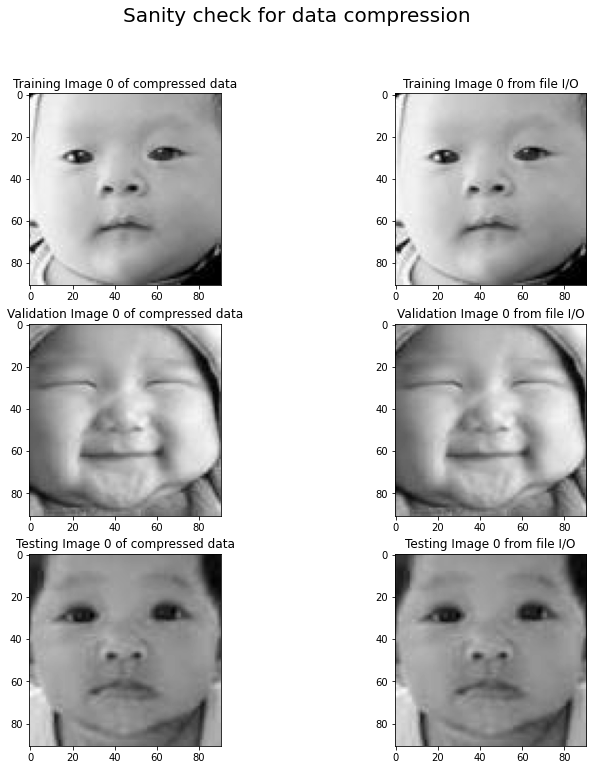

In [30]:
# Sanity check to ensure that the images imported are the same
print("Is training image 0 equal in both: {}".format(np.array_equal(train_samples[0], dataset.train_data[0][0])))
print("Is validation image 0 equal in both: {}".format(np.array_equal(val_samples[0], dataset.val_data[0][0])))
print("Is testing image 0 equal in both: {}".format(np.array_equal(test_samples[0], dataset.test_data[0][0])))
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Sanity check for data compression", fontsize=20)
axes[0,0].imshow(train_samples[0], cmap="gray")
axes[0,0].set_title("Training Image 0 of compressed data")
axes[0,1].imshow(dataset.train_data[0][0], cmap="gray")
axes[0,1].set_title("Training Image 0 from file I/O")
axes[1,0].imshow(val_samples[0], cmap="gray")
axes[1,0].set_title("Validation Image 0 of compressed data")
axes[1,1].imshow(dataset.val_data[0][0], cmap="gray")
axes[1,1].set_title("Validation Image 0 from file I/O")
axes[2,0].imshow(test_samples[0], cmap="gray")
axes[2,0].set_title("Testing Image 0 of compressed data")
axes[2,1].imshow(dataset.test_data[0][0], cmap="gray")
axes[2,1].set_title("Testing Image 0 from file I/O")

### 1.5. Samples from UTK

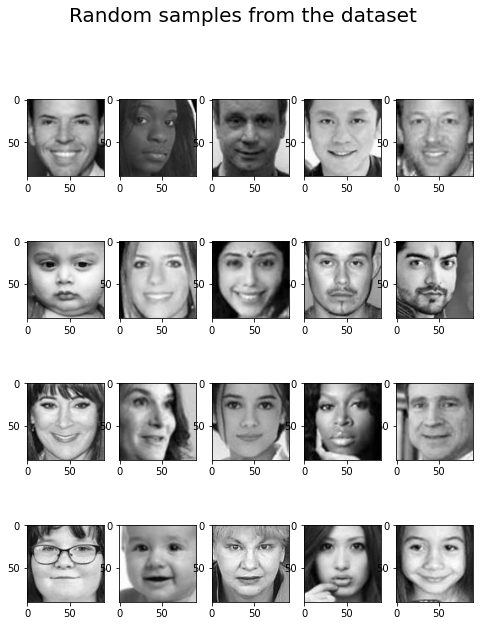

In [35]:
# Generate random data indexes
random_idx = np.random.permutation(train_samples.shape[0])
random_train_samples = train_samples[random_idx[:20]]
random_train_labels = train_labels[random_idx[:20]]
fig, axes = plt.subplots(4,5, figsize=(8,10))
fig.suptitle("Random samples from the dataset", fontsize=20)
for img_idx in range(random_train_samples.shape[0]):
    row = img_idx // 5
    col = img_idx % 5
    axes[row, col].imshow(random_train_samples[img_idx], cmap="gray")

# 2. Statisctics of UTK

Following section aims to understand statistics of the dataset.

In [32]:
import pandas as pd

df_train = pd.DataFrame(data=train_labels, columns=["Age_Train"])
df_val = pd.DataFrame(data=val_labels, columns=["Age_Val"])
df_test = pd.DataFrame(data=test_labels, columns=["Age_Test"])
print(df_train.describe())
print(df_val.describe())
print(df_test.describe())

         Age_Train
count  5400.000000
mean     32.030186
std      18.231842
min       1.000000
25%      23.000000
50%      29.000000
75%      42.000000
max      80.000000
           Age_Val
count  2315.000000
mean     32.020302
std      18.229641
min       1.000000
25%      23.000000
50%      29.000000
75%      42.000000
max      80.000000
          Age_Test
count  1159.000000
mean     32.000000
std      18.223663
min       1.000000
25%      23.000000
50%      29.000000
75%      42.000000
max      80.000000


Text(0.5, 1.0, 'Test Samples')

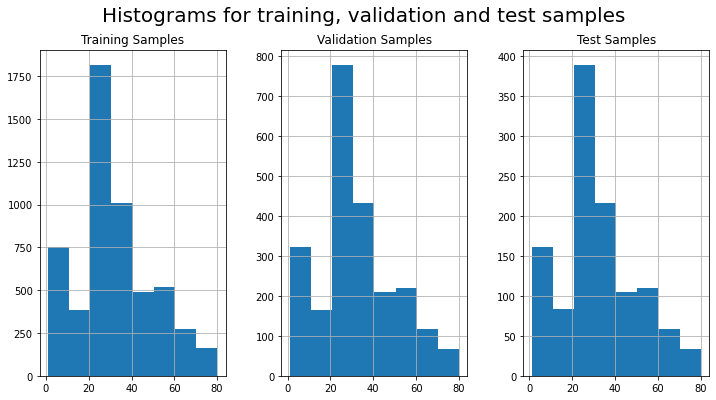

In [33]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
fig.suptitle("Histograms for training, validation and test samples", fontsize=20)
df_train.hist(bins=8, ax=axes[0])
axes[0].set_title("Training Samples")
df_val.hist(bins=8, ax=axes[1])
axes[1].set_title("Validation Samples")
df_test.hist(bins=8, ax=axes[2])
axes[2].set_title("Test Samples")

## Remarks on UTK

* The age distribution on each sample is exactly same with each other. 

* 20-30 age group, is the biggest group in the dataset. This groups contains almost half of the samples.

* Due to imbalance on dataset, the trained model can be biased towards 20-30 age group. However, since the test sample has the same distribution this problem can go unnoticed.
